<a href="https://www.kaggle.com/code/maicmi/ds-salary-prediction-with-tensorflow?scriptVersionId=132873502" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Science Salary Prediction with TensorFlow

TensorFlow offers multiple levels of abstraction so you can choose the right one for your needs. Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy.


### Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
@import url("https://fonts.googleapis.com/css2?family=Oswald&family=Roboto:ital,wght@0,500;0,900;1,500&display=swap");
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    display: inline-block;
    text-align: center;
    padding: 30px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Oswald;
    border-radius: 5px;
}

h2 {
    display: inline-block;
    text-align: center;
    padding: 25px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Oswald;
    border-radius: 5px;
}

h3 {
    display: inline-block;
    text-align: center;
    padding: 20px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Oswald;
    border-radius: 5px;
}


body, p, ul, li {
    font-family: Oswald;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: Oswald;
    font-size: 20px;
    background: linear-gradient(to right, #30CFD0 0%, #121FCF 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}
</style>
""")

In [2]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.1 MB/s eta 0:00:00


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [4]:
import tensorflow as tf
print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [5]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Exploratory data analysis

In [6]:
plt.style.use('seaborn-v0_8')

In [7]:
df_eda = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

## Data Summary

In [8]:
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df_eda)

Dataset has 11 features and 3755 examples.


,Unique,Missing,Duplicated,Types
work_year,4,0,1171,int64
experience_level,4,0,1171,object
employment_type,4,0,1171,object
job_title,93,0,1171,object
salary,815,0,1171,int64
salary_currency,20,0,1171,object
salary_in_usd,1035,0,1171,int64
employee_residence,78,0,1171,object
remote_ratio,3,0,1171,int64
company_location,72,0,1171,object


#### Maximum Salary

Staff Data Scientist is the Job title who earn the maximum salary. He has the SE (Senior Level) experience level. Surprisingly, the employment type is not full time, it is the part time and he works as remote 100%. Since salary is the total gross salary amount paid so it looks quite high.

In [9]:
df_eda.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

#### There are many tech startup
This data show that there are many people work with the company medium size.

In [10]:
import plotly.express as px 

# plotting the pie chart
fig = px.pie(df_eda, title="comapny_size", names="company_size") 
  
# showing the plot
fig.show()

In [11]:
import plotly.express as px 

# plotting the pie chart
fig = px.pie(df_eda, title="work_year", names="work_year") 
  
# showing the plot
fig.show()

#### The Majority of Job Title is Data Engineer

<Axes: xlabel='count', ylabel='job_title'>

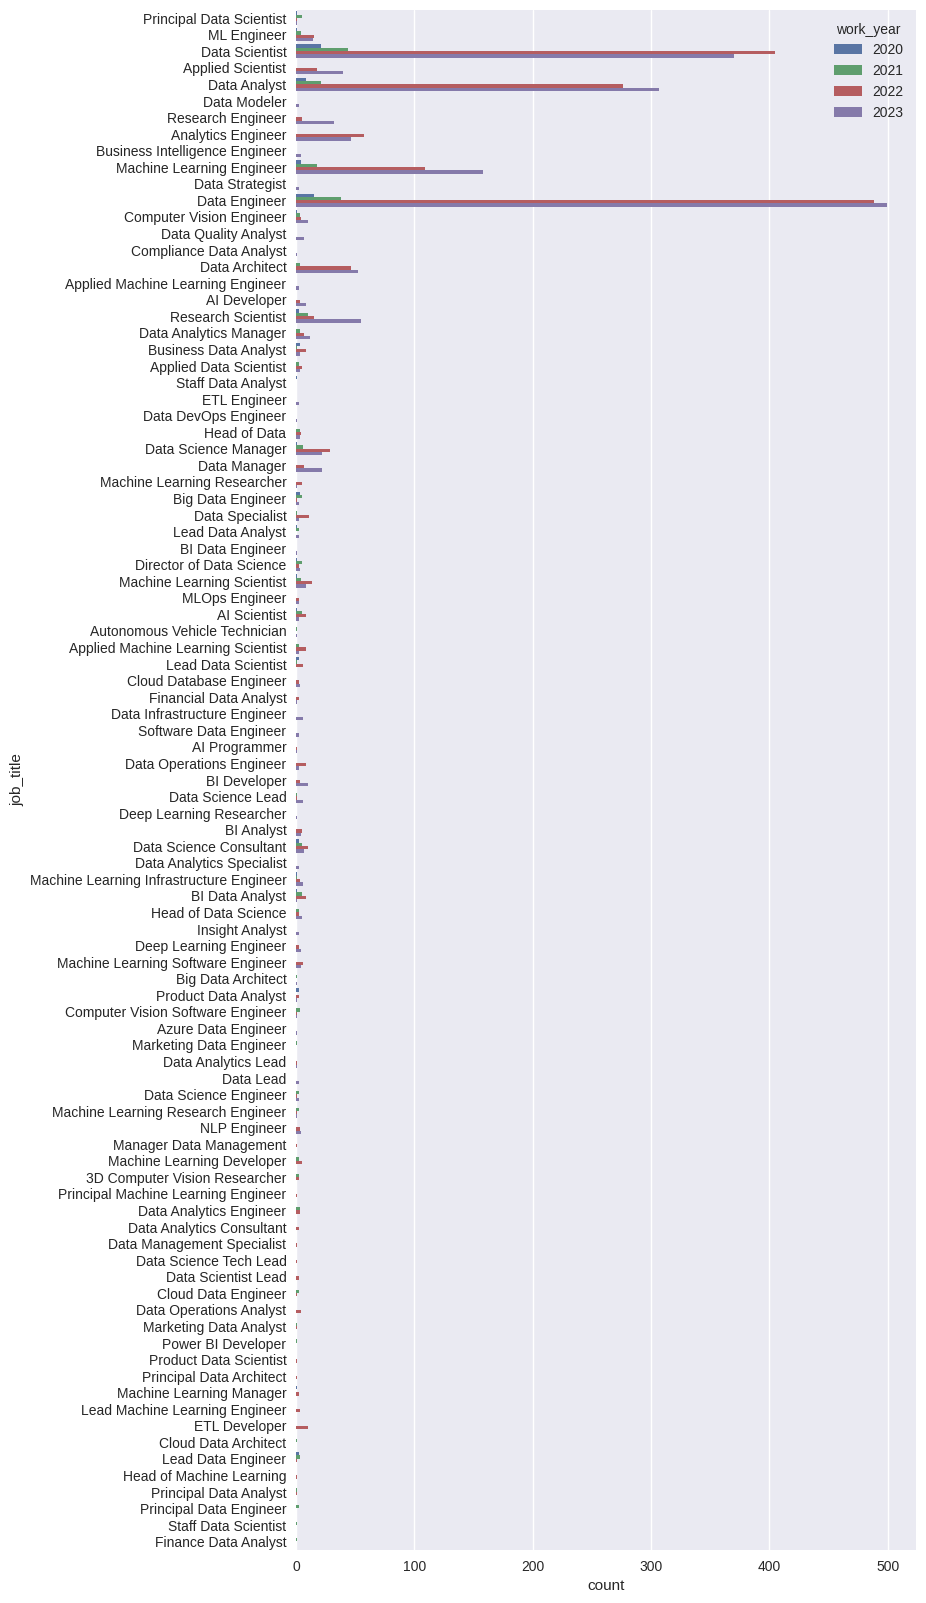

In [12]:
plt.figure(figsize=(8,20))
sns.countplot(data=df_eda, y="job_title", hue="work_year")

In [13]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=2aa24a755194e5725a71268cf9596f924afac8ca9c223eed77b535167b92126a
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [14]:
# Import pycountry package
import pycountry

# define function to find country name
def do_search(country_code):
    try:
        result = pycountry.countries.get(alpha_2=country_code)
    except Exception:
        return np.nan
    else:
        return result.name

# Given ISO Alpha 2 column return country name
df_eda["country"] = df_eda["company_location"].apply(lambda country_code: do_search(country_code))
df_eda.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,United States
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,United States
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada


#### The most data science people are in United States and they are senior level

<Axes: xlabel='count', ylabel='country'>

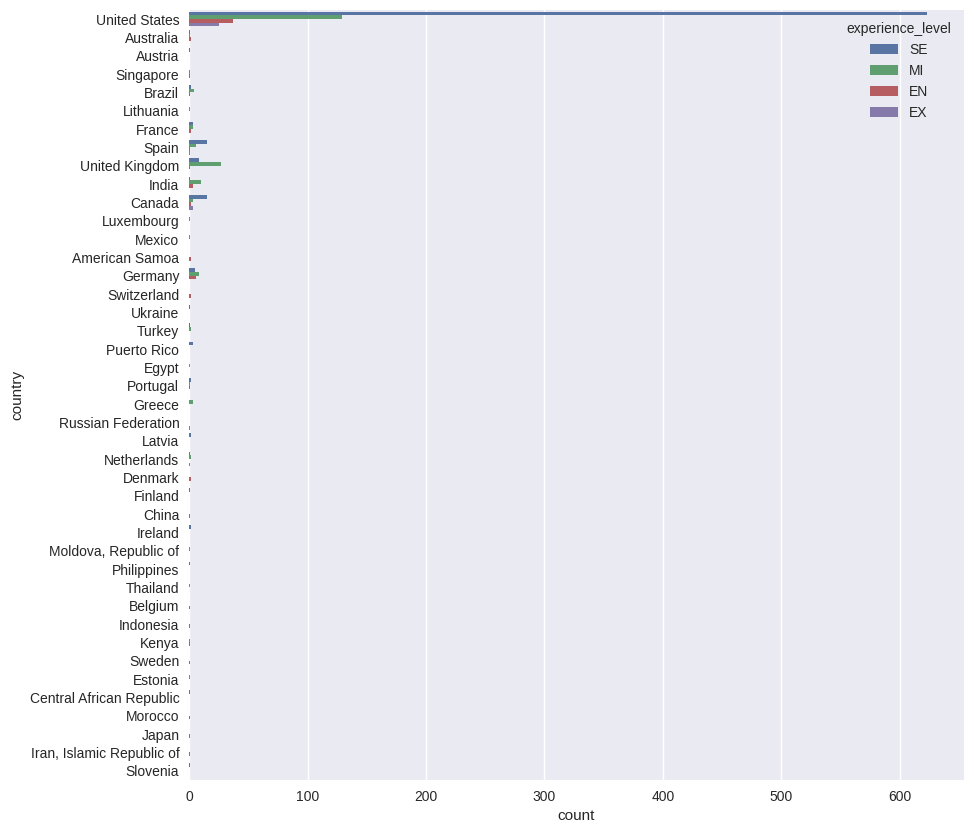

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_eda.sample(1000), y="country", hue="experience_level")

#### The most companies are in United States and remote working is popular

<Axes: xlabel='count', ylabel='country'>

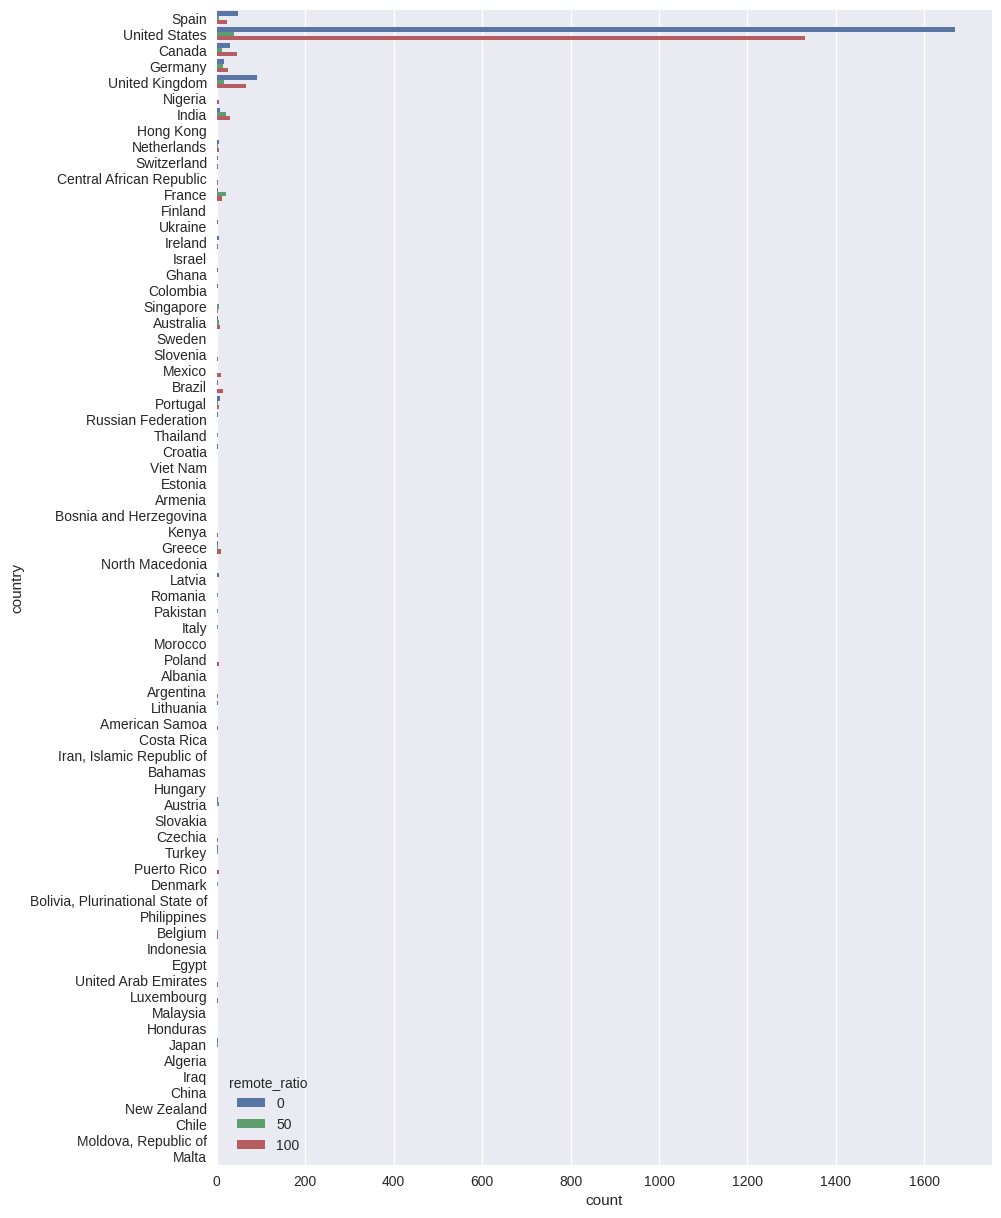

In [16]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_eda, y="country", hue="remote_ratio")

#### The top paid salary by experience level

<Axes: xlabel='experience_level', ylabel='count'>

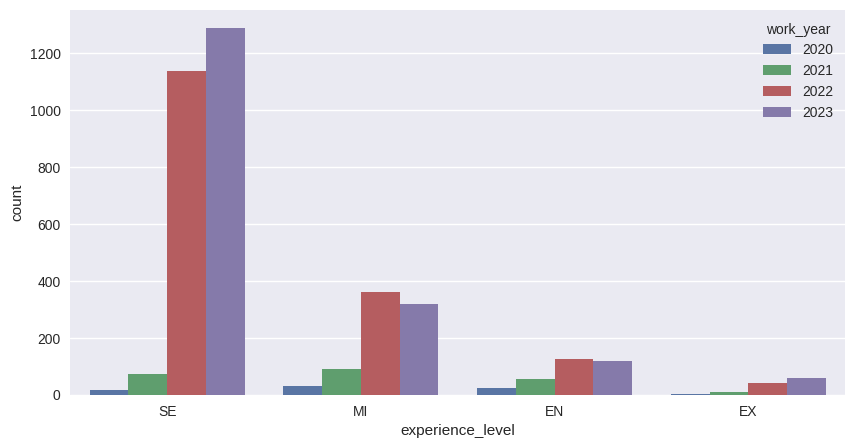

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_eda, x="experience_level", hue="work_year")

# Train the model using TensorFlow

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Transform data using LabelEncoder
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X = df.drop(["salary_in_usd"], axis=1)
y = df["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int64
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int64
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int64
 10  company_size        3755 non-null   int64
dtypes: int64(11)
memory usage: 322.8 KB


In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


## Create, compile, and train the model

In [21]:
# Set seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 118006.6016 - mae: 118006.6016
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 62354.5781 - mae: 62354.5781
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 56930.3320 - mae: 56930.3320
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 57167.9531 - mae: 57167.9531
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 57709.7031 - mae: 57709.7031
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 56524.7578 - mae: 56524.7578
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 56323.6211 - mae: 56323.6211
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 56151.7344 - mae: 56151.7344
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 56478.2578 - mae: 56478.2578
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 56400.

<Axes: >

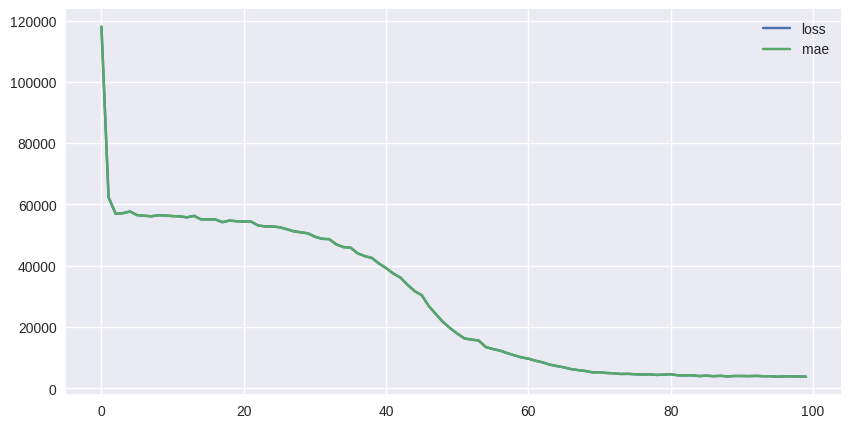

In [22]:
# Plot loss curves
pd.DataFrame(history.history).plot(figsize=(10,5))

#### Making Prediction

In [23]:
prediction = model.predict(X_test)

24/24 [==============================] - 0s 1ms/step


#### Convert to a 1-dimensional array

I have to convert the prediction to a 1-dimensional array to calculate any metrics.<br>
Using ravel() function from Numpy:

In [24]:
prediction = np.ravel(prediction)

#### Plot the prediction result

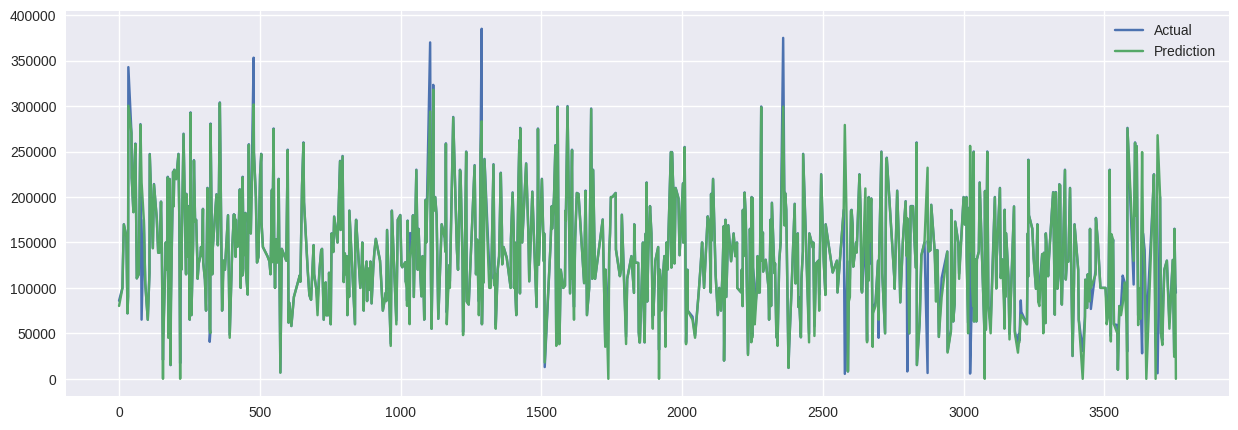

In [25]:
# Prepare data for plot
df_final = pd.DataFrame({"Y_test": y_test , "Prediction" : prediction})

# Sort index before plot
df_final = df_final.sort_index()

# Plot the final result
plt.figure(figsize= (15,5))
plt.plot(df_final)
plt.legend(["Actual" , "Prediction"])

# Conclusion

Data preprocessing is very important. There are some technique to encode the features.<br>

Using LabelEncoder helps to decrease loss and mae then I can get the good result.🎉🎉🎉